In [1]:
import torch
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt

## Variables are tensors that can have their gradients calculated 

In [2]:
v = torch.randn(5,1) * 10
x = Variable(v, requires_grad=True)
print(x, type(x))

(Variable containing:
  9.7447
 -6.4033
 -6.5713
 26.7116
-17.0967
[torch.FloatTensor of size 5x1]
, <class 'torch.autograd.variable.Variable'>)


## Lets create a line to learn

In [3]:
lin = Variable(torch.FloatTensor(list(range(5))))
target =  lin * 2 + 1  # y = 2x + 1

## We can calculate the loss between our line and a random vector

In [4]:
# loss using MSE
loss = (target-x).pow(2).sum() / x.size(0)
print(loss)

Variable containing:
 273.6743
[torch.FloatTensor of size 1]



## Backpropogate the error
calling `.backward()` on a Variable that has been computed backpropogates the error for all parent variables that require gradients

In [5]:
loss.backward()

## Gradients of x

In [6]:
x.grad.data


  3.4979
 -3.7613
 -4.6285
  7.8846
-10.4387
[torch.FloatTensor of size 5x1]

## Plot of target, random line, dx/dtarget

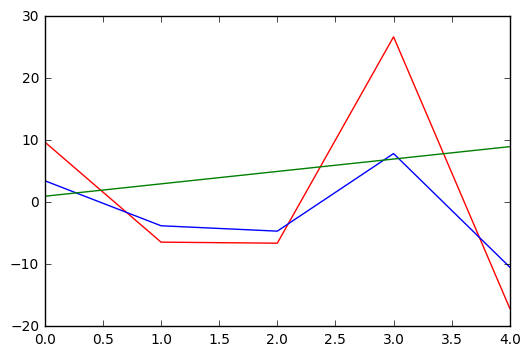

In [7]:
plt.plot(x.data.numpy(), color="red")
plt.plot(x.grad.data.numpy(), color="blue")
plt.plot(target.data.numpy(), color="green")

## Update the x Variable and zero the gradients on x

In [8]:
lr = 1
x.data -= lr * x.grad.data
x.grad.data.zero_()


 0
 0
 0
 0
 0
[torch.FloatTensor of size 5x1]

## Plot of x and target after the update

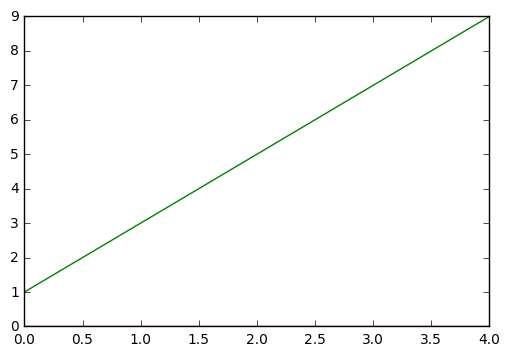

In [11]:
plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")

('epoch:', 0)


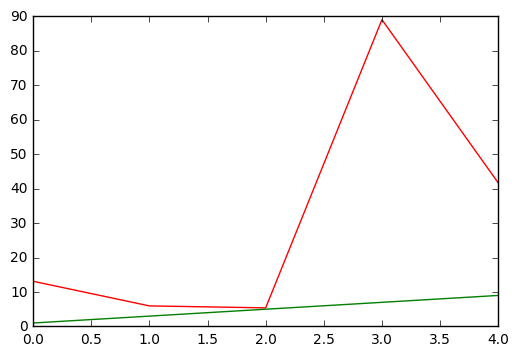

('epoch:', 1)


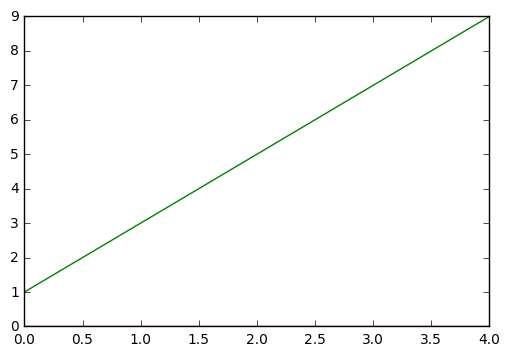

('epoch:', 2)


RuntimeError: Trying to backward through the graph second time, but the buffers have already been freed. Please specify retain_variables=True when calling backward for the first time.

In [10]:
lr = 1

for epoch in range(5):
    print('epoch:', epoch)
    loss = (x-target).pow(2).sum() / x.size(0)
    loss.backward()
    
    x = x * lr * x.grad
    x.grad.data.zero_()

    plt.plot(x.data.numpy(), color="red")
    plt.plot(target.data.numpy(), color="green")
    plt.show()
    
